# Thresholding
Thresholding is a technique to remove any pixel with value less than the specific threshold. Thresholding can be used in image segmentation, which is an important topic in computer vision that leverages matrix manipultation to extract pixels of interest (POI) from an input image. In this note, we will work on a demo data from SkImage. The data image contains 24 coins in different sizes, and we want to use thresholding approach to remove the image background from the original image.

## Data
* Load libraries for demo data (skimage), matrix manipulation (np), and visualization (plt),

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

*  First, let's take a look at our data.

Dimension   :  (303, 384)
Image matrix:
 [[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]


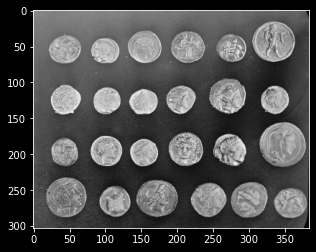

In [3]:
image = data.coins()
print("Dimension   : ", image.shape) # 303 rows and 384 columns
print("Image matrix:\n", image)
plt.imshow(image, cmap="gray")

## Derive summary statistics
* We can derive some basic statistics from the image.


In [12]:
np.mean(image).round(2)
np.std(image).round(2)
np.quantile(image, .25)
np.quantile(image, .5)
np.quantile(image, .75)

139.0

* compute a histogram for the signal intensity. First, lt's define our own histogram function first.

In [10]:
def custom_hist(image):
    counts, bins = np.histogram(image)
    # plt.bar() take x-position and height for each bin as the first two arguments.
    # bins is the edges of each bin, so we drop the last one which is the right edge of the last bin.
    plt.bar(bins[:-1], counts,
            width=np.diff(bins), edgecolor="black")

* See if it works in our demo data. And put things together.

Mean:  96.86
Standard deviation:  52.88
The 25th quantile:  51.0
The 50th quantile:  86.0
The 75th quantile:  139.0


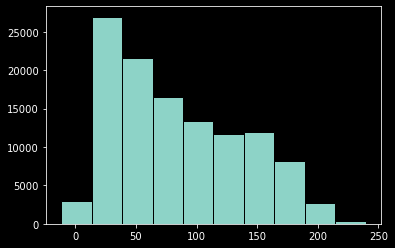

In [11]:
custom_hist(image) # it works!
print("Mean: ", np.mean(image).round(2))
print("Standard deviation: ", np.std(image).round(2))
print("The 25th quantile: ", np.quantile(image, .25))
print("The 50th quantile: ", np.quantile(image, .5))
print("The 75th quantile: ", np.quantile(image, .75))

## Find a threshold
* Remember we can manually crop a small portion of an image? Here we can try to segment one single coin out!

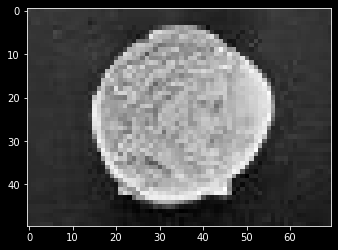

In [15]:
coin = image[100:150, 10:80]
plt.imshow(coin, cmap="gray")

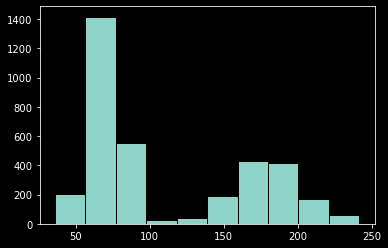

In [16]:
custom_hist(coin)

* Did you notice two clusters in the histogram? We can set a threshold to separate them.

In [18]:
threshold = 110
mask = coin > threshold

print("Coin dimension : ", coin.shape) # 50 rows and 70 columns
print("Mask dimension : ", mask.shape) # 50 rows and 70 columns
print("Image matrix:\n", mask)


Coin dimension :  (50, 70)
Mask dimension :  (50, 70)
Image matrix:
 [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


* The mask is a binary matrix showing which pixel meets the condition (i.e., values greather than the threshold). Let's visualize it.

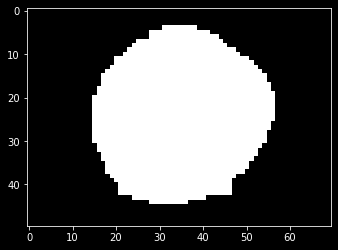

In [20]:
plt.imshow(mask, cmap="gray")

* Not bad, right? How about the entire image?

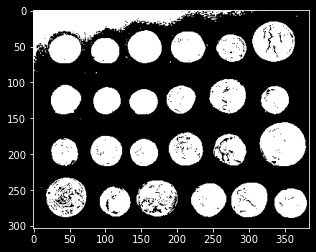

In [21]:
plt.imshow(image > threshold, cmap="gray")

* However, it didn't do well for all the coins, and we may include background pixels we are not interested in. How about we set multiple thresholds and see which one works the best?

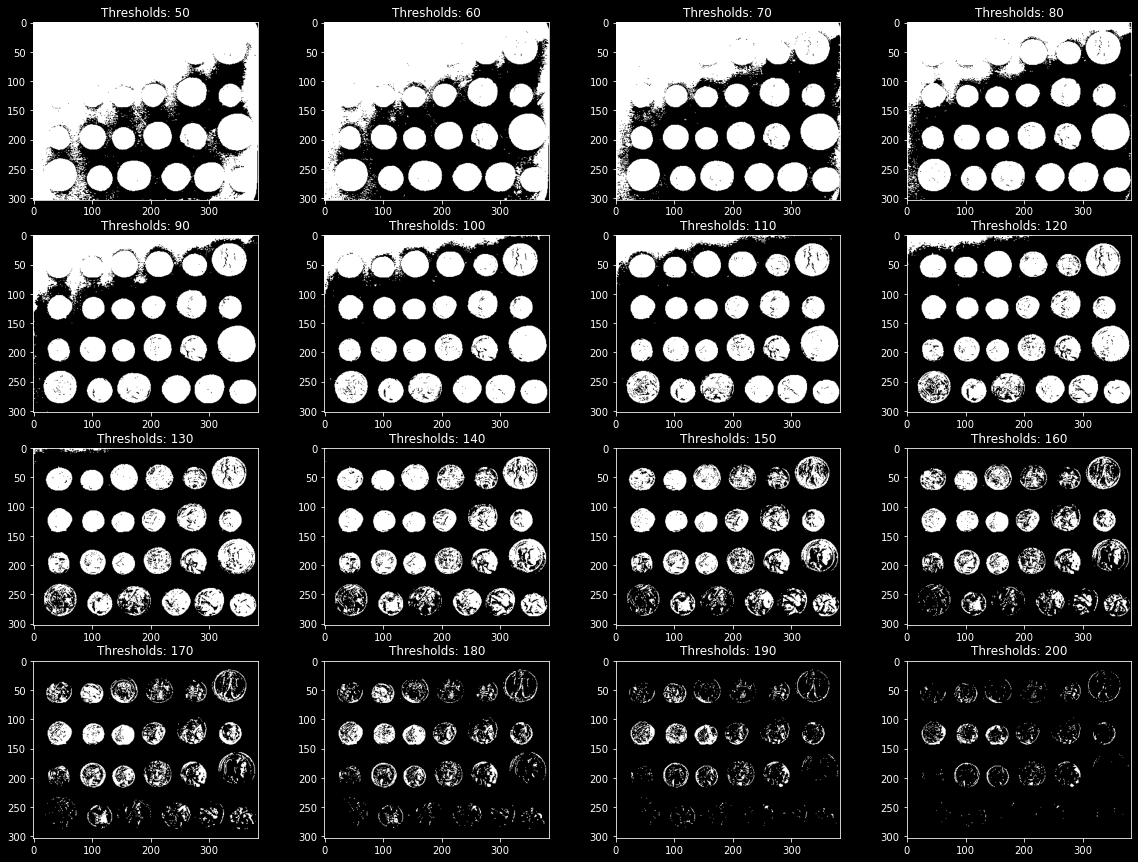

In [90]:
threds = np.arange(50, 210, 10)
nrows = 4
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))
i = 0
for row in range(nrows):
    for col in range(ncols):
        threshold = threds[i]
        axes[row, col].imshow(image > threshold, cmap="gray")
        axes[row, col].title.set_text("Thresholds: %d" % threshold)
        i += 1


## Apply the selected threshold
* You will notice that when the threshold = 140, you can keep the most details of coins and minimize including background pixels. Let's apply the mask back to our original image.

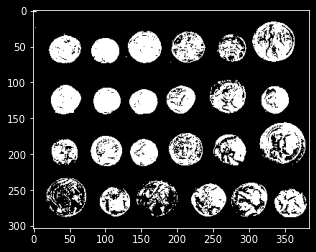

In [97]:
threshold = 140
mask = image > threshold
plt.imshow(mask, cmap="gray")

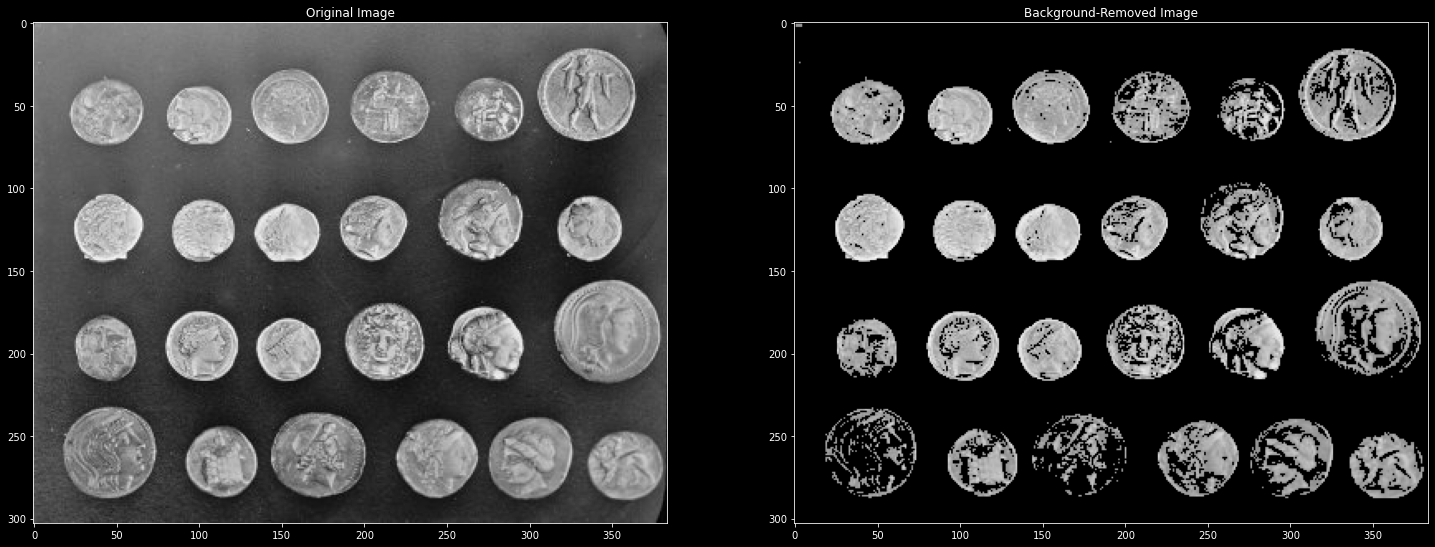

In [105]:
new_image = np.zeros(image.shape)
new_image[mask] = image[mask]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 15))
axes[0].imshow(image, cmap="gray")
axes[0].title.set_text("Original Image")
axes[1].imshow(new_image, cmap="gray")
axes[1].title.set_text("Background-Removed Image")